<a href="https://colab.research.google.com/github/vbayarri/SpainAI_2020_reto_NLP/blob/main/1.Jupyter/AbstractiveSummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.thepythoncode.com/article/text-summarization-using-huggingface-transformers-python


Ejecutar para instalar las librerias necesarias

In [62]:
!pip3 install transformers torch

## Importar datos

In [2]:
import io
import pandas as pd
import requests
from transformers import pipeline

# Utilizar pipeline de resumen de textos
summarization = pipeline("summarization")

In [3]:
train = "https://raw.githubusercontent.com/vbayarri/SpainAI_2020_reto_NLP/main/0.Dataset/train.csv"
req = requests.get(train)
traindata = req.text
trainpd = pd.read_csv(io.StringIO(traindata), sep=",", dtype=str)

test = "https://raw.githubusercontent.com/vbayarri/SpainAI_2020_reto_NLP/main/0.Dataset/test_descriptions.csv"
req = requests.get(test)
testdata = req.text
testpd = pd.read_csv(io.StringIO(testdata), sep=",", dtype=str)

Estructura de los datos:

In [67]:
trainpd.describe()

AttributeError: ignored

In [70]:
trainpd.head(10)

,name,description
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...
3,SHIRT DRESS,Collared dress featuring sleeves falling below...
4,PUFF SLEEVE DRESS WITH PLEATS TRF,Loose-fitting midi dress with a round neckline...
5,FLORAL PRINT DRESS TRF,Midi dress with a round neckline and short sle...
6,PRINTED DRESS TRF,Midi dress with a shirt collar and sleeves fal...
7,PRINTED MIDI DRESS TRF,Dress with a round neck and long sleeves. Feat...
8,LOOSE-FITTING TEXTURED DRESS TRF,"Short dress featuring a round neckline, long w..."
9,RUFFLED PRINTED DRESS TRF,Short dress featuring a round neckline and lon...


In [ ]:
trainpd.description.map(lambda x: len(x)).max()

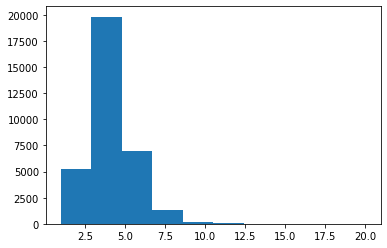

In [76]:
## Estimate Average Length of Text and Summary
name_len = []
description_len=[]
trainpd['name'].map(lambda x : name_len.append(len(x.split())))
trainpd['description'].map(lambda x : description_len.append(len(x)))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(name_len)
plt.show()

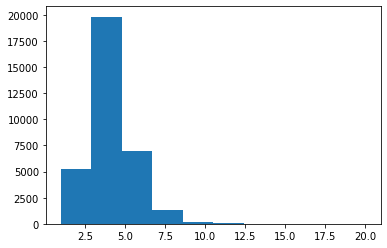

In [77]:
%matplotlib inline
plt.hist(name_len)
plt.show()

Utilización de la pipeline de sumarización

In [7]:
# using pipeline API for summarization task
original_text=trainpd.iloc[0,1]

summary_text = summarization(original_text, min_length=2, max_length=5)

print("Original:", original_text)
print("Summary:", summary_text[0]['summary_text'])

Original: Jacket made of a technical fabric with texture. High collar and long sleeves. Front pockets. Ribbed trims. Zip-up front.
Summary:  Jacket made


Using T5 Model


In [8]:
!pip3 install sentencepiece

     |████████████████████████████████| 1.2MB 20.2MB/s 


In [61]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Models available = 't5-small', 't5-base', 't5-large', 't5-3b', 't5-11b'

# initialize the model architecture and weights
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# initialize the model tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

#input_ids = tokenizer.encode(original_text, return_tensors="pt")  # Batch size 1

article = """
Justin Timberlake and Jessica Biel, welcome to parenthood. 
The celebrity couple announced the arrival of their son, Silas Randall Timberlake, in statements to People. 
"Silas was the middle name of Timberlake's maternal grandfather Bill Bomar, who died in 2012, while Randall is the musician's own middle name, as well as his father's first," People reports. 
The couple announced the pregnancy in January, with an Instagram post. It is the first baby for both.
"""

# encode the text into tensor of integers using the appropriate tokenizer
inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=512, truncation=True)

# generate the summarization output
outputs = model.generate(
    inputs, 
    max_length=150, 
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)
# just for debugging
print(outputs)
print(tokenizer.decode(outputs[0]))

AttributeError: ignored